# Entregável 02 - Turing Academy

#### Nome: Mariana Souza SIlva

link do enunciado (com dataset): https://docs.google.com/document/d/1JeGIkXKxqZwfo_ViF9-qEaKky4hfjy7qpSF1YJVJ_qQ/edit?usp=sharing

### Análise do Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset2.csv")

In [3]:
df

,sex,age,height,weight
0,M,62,1.874021,114.384199
1,F,44,1.672676,76.031332
2,F,49,1.587970,46.403086
3,F,25,1.653451,104.352744
4,M,65,1.744867,76.831890
...,...,...,...,...
9995,M,68,1.999051,135.605141
9996,female,33,1.601821,141.973080
9997,M,25,1.926656,131.105269
9998,F,32,1.844436,62.475271


In [4]:
df.info() #datatypes compatíveis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     10000 non-null  object 
 1   age     10000 non-null  int64  
 2   height  10000 non-null  float64
 3   weight  10000 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 312.6+ KB


In [5]:
df.describe() # weight apresenta valores absurdos de massa? muito baixos e muito altos tb

,age,height,weight
count,10000.000000,10000.000000,10000.000000
mean,42.171700,1.708993,88.910496
std,16.425919,0.099272,33.328269
min,14.000000,1.376462,17.970189
25%,28.000000,1.636008,69.394196
50%,42.000000,1.702588,83.518259
75%,57.000000,1.776343,99.050654
max,70.000000,2.054139,335.295817


## 2.a)

<Figure size 1400x1500 with 0 Axes>

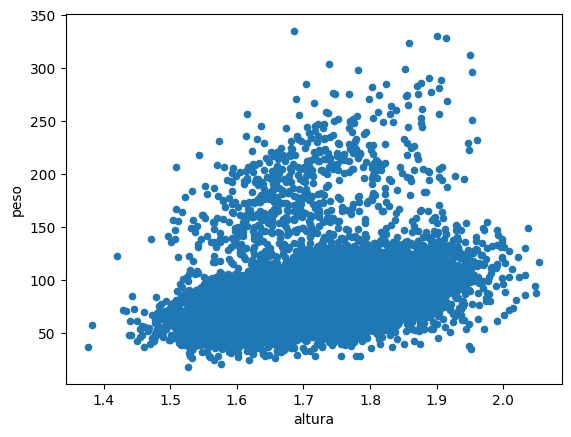

In [6]:
plt.figure(figsize=(14, 15))
df.plot(kind='scatter', x='height', y='weight', xlabel='altura', ylabel='peso')
plt.show()

O dataset apresenta valores absurdos de peso - muito altos e muito baixos também.

## 2.b)

In [7]:
df.sex.unique() #vamos separar os tais dois conjuntos de dados

array(['M', 'F', 'male', 'female'], dtype=object)

In [8]:
mask1 = ((df.sex == 'M') | (df.sex == 'F'))
M = df[mask1]
male = df[~mask1]

In [9]:
M.describe()

,age,height,weight
count,9341.000000,9341.000000,9341.000000
mean,42.134782,1.709510,82.418147
std,16.421689,0.099456,20.188283
min,14.000000,1.376462,17.970189
25%,28.000000,1.636289,68.399528
50%,42.000000,1.703352,81.747162
75%,56.000000,1.777154,95.383977
max,70.000000,2.054139,166.235710


In [10]:
male.describe()

,age,height,weight
count,659.000000,659.000000,659.000000
mean,42.694992,1.701653,180.936348
std,16.489367,0.096399,44.879280
min,14.000000,1.419564,61.106421
25%,29.000000,1.633500,148.137995
50%,42.000000,1.692808,176.457500
75%,57.000000,1.767464,208.595976
max,70.000000,1.960126,335.295817


Vemos que o conjunto de dados que tem 'male' e 'female' como categorias para 'sex' apresenta valores de peso muito altos de modo uniforme - podemos supor que eles estão em libras

In [11]:
df.loc[df[~mask1].index, 'weight'] = df[~mask1].weight*0.45359237

In [12]:
df.sex = df.sex.replace({'male': 'M', 'female': 'F'})

In [13]:
df.describe() 

,age,height,weight
count,10000.000000,10000.000000,10000.000000
mean,42.171700,1.708993,82.395292
std,16.425919,0.099272,20.198597
min,14.000000,1.376462,17.970189
25%,28.000000,1.636008,68.295903
50%,42.000000,1.702588,81.615957
75%,57.000000,1.776343,95.336840
max,70.000000,2.054139,166.235710


Valores mais coerentes para o peso

<Figure size 1400x1500 with 0 Axes>

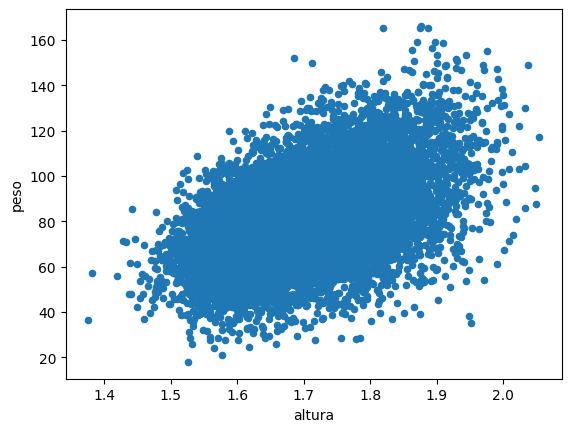

In [14]:
plt.figure(figsize=(14, 15))
df.plot(kind='scatter', x='height', y='weight', xlabel='altura', ylabel='peso')
plt.show()

Agora vemos uma distrbuição melhor dos dados

## 2.c)

In [15]:
df['IMC'] = df.weight/(df.height*df.height)

In [16]:
df

,sex,age,height,weight,IMC
0,M,62,1.874021,114.384199,32.569938
1,F,44,1.672676,76.031332,27.174950
2,F,49,1.587970,46.403086,18.401889
3,F,25,1.653451,104.352744,38.169932
4,M,65,1.744867,76.831890,25.235778
...,...,...,...,...,...
9995,M,68,1.999051,135.605141,33.933486
9996,F,33,1.601821,64.397906,25.098266
9997,M,25,1.926656,131.105269,35.319260
9998,F,32,1.844436,62.475271,18.364586


## 2.d)

Outliers Univariados: São descobertos com análise de apenas uma variável

Outliers Multivariados: São descobertos com análise de mais de uma variável ao mesmo tempo.

In [17]:
df.describe() #olhando a feature IMC já podemos analisar alguns valores discrepantes (multivariados)

,age,height,weight,IMC
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,42.171700,1.708993,82.395292,28.108263
std,16.425919,0.099272,20.198597,5.995677
min,14.000000,1.376462,17.970189,7.715833
25%,28.000000,1.636008,68.295903,24.060778
50%,42.000000,1.702588,81.615957,28.107503
75%,57.000000,1.776343,95.336840,32.205033
max,70.000000,2.054139,166.235710,53.519624


In [18]:
mask = (df.IMC < 13) | (df.IMC > 48) #vamos tirar IMCS extremamente baixos ou altos
outliers = df[mask].index

In [19]:
df.loc[outliers, 'IMC']  = df[~mask].IMC.mean()
df.loc[outliers, 'weight'] = df[mask].height*df[mask].height*df[~mask].IMC.mean()

<Axes: xlabel='altura', ylabel='peso'>

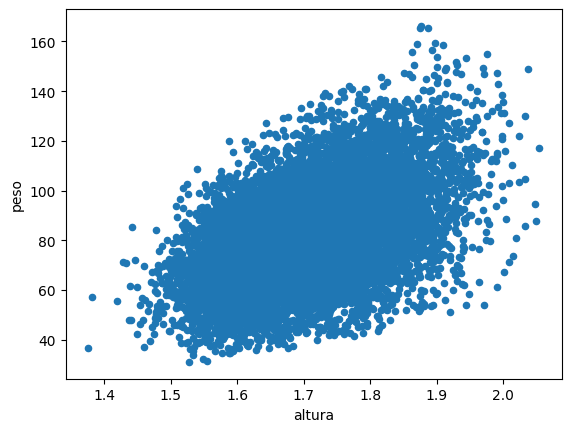

In [21]:
df.plot(kind='scatter', x='height', y='weight', xlabel='altura', ylabel='peso')

## 2.e)

In [23]:
saudavel = (df.IMC >= 18.5) & (df.IMC <= 24.9)

In [24]:
df[saudavel].shape[0]/df.shape[0]*100

24.060000000000002

24% da população se enquadra como saudável de acordo com o dataset.

## 2.f)

<Axes: xlabel='sex', ylabel='height'>

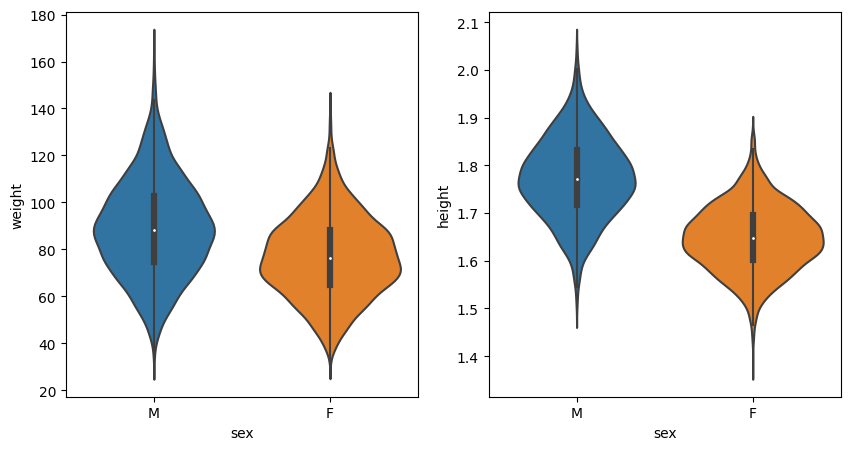

In [25]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='sex', y='weight')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='sex', y='height')

O primeiro gráfico indica que as mulheres têm pesos ligeiramente menores que os homens, em geral. Enquanto elas se concentram próximas a 70kg, os homens se concentram perto dos 90kg

O segundo gráfico mostra uma grande disparidade de altura entre homens e mulheres, sendo estas mais baixas que aqueles, em geral. As mulheres apresentariam uma altura média na casa de 1,65m, enquanto homens, por volta de 1,75.